The ideal model is one that stands right at the border between underfitting and overfitting. To figure out how big a model you will need, you must develop a model that overfits, this is easily done by:

1. Add layers
2. Make the layers bigger
3. Train for more epochs
When you see the model's performance on the validation data begins to degrade, you have achieved overfitting.

Improving model fit:

To achieve the perfect fit, you must first overfit. Since you don't know in advance where the boundary lies, you must cross it to find it. A model shows some generalization power means that it is able to overfit. There are three common problems:

1. Training doesn't get started: your training loss doesn't go down over time.
2. Training gets started just fine, but your model doesn't meanfully generalize: you cannot beat the common-sense baseline you set.
3. Training and validation loss both go down over time, and you can beat your baseline, but you don't seem to be able to overfit, which indicates you are still underfitting.


For case 1--> tuning key gradient descent parameters

Sometimes training doesn't get started, or it stalls too early. Your loss is stuck. This is "always" something you can overcome. Even if nothing about your problem makes sense, you should still be able to train something-if only by memorizing the training data.

This is always a problem with the configuration of the gradient descent process, your choice of optimizer, the distribution of initial values in the weights of your model, your learning rate, or your batch size. All these parameters and interdependent, and as such it is usually "sufficient to tune the learning rate and the batch size" while keeping the rest of the parameters constant.

If you find yourself in a similar situation, try 

1. Lowering or increasing the learning rate. A learning rate that is too high may lead to updates that vastly overshoot a proper fit, and a learning rate that is too low may make training so slow that it appears to stall.

2. Increasing the batch size. A batch with more samples will lead to gradients that are more informative and less noisy (lower variance).

For case 2--> leveraging better architecture priors

You have a model that fits, but for some reason your validation metrics aren't improving at all. Your model trains but doesn't generalize. This is perhaps the worst machine learning situation. It indicates that something is fundamentally wrong with your approach, and it may not be easy to tell what.

First, it may be that the input data you are using simply doesn't contain sufficient information to predict your targets: the problem as formulated is not solvable. 

It may also be that the kind of model you are using is not suited for the problem at hand. Using a model that makes the right assumptions about the problem is essential to achieve generalization: you should leverage the right architecture priors. 

For case 3--> increasing model capacity

If you manage to get to a model that fits, where validation metrics are going down, and that seems to achieve some level of generalization power, next, you need to get your model to start overfitting.

In this case, validation metrics seem to stall, or to imrpove very slowly, instead of peaking and reversing course. The validation loss goes to, say, 0.26 and just stays there. You can fit, but you cannot clearly overfit, even after many iterations over the training data.

It should always be possible to overfit. If you cannot seem to be able to overfit, it's likely a problem with the "represnetational power" on your model: you are going to need a bigger model, one with more "capacity", that is to say, one able to store more information.

You can increase representational power by
1. adding more layers
2. using bigger layers (layers with more parameters)
3. using kinds of layers that are more appropriate for the problem (better architecture priors)

Improving Generalization

Once the model has some generalization power and be able to overfit, we should focus on maximizing generalization.

EarlyStopping:

We would start by training our models for longer than needed to figure out the number of epochs that yielded the best validation metrics, and then we would retrain a new model for exactly that number of epochs. This is standard, but it requires you to do redundant work, which can sometimes be expensive. 

Naturally, you could just save your model at the end of each epoch, and once you have found the best epoch, reuse the closest saved model you have.  In Keras, we can do this with an "EarlyStopping" callback, which will interrupt training as soon as validation metrics have stopped improving, while remembering the best known model state. 

Regularizing your model:

Regularization techniques are a set of best practices that actively impede the model's ability to fit perfectly to the training data, with the goal of making the model perform better during validation. It tends to make the model simpler, more "regular", its curve smoother, more generic; thus it is less specific to the training set and better able to generalize by more closely approximating the latent manifold of the data. 

Three common approaches:

1. Reducing the network's size

2. Adding weight regularization

3. Adding dropout

Case 1: reducing the network's size

There is no magical formula to determine the right number of layers or the right size for each layer. You must evaluate an array of different architectures (on your validation set, not on the test set) in order to find the correct model size for your data. The general workflow is to start with relatively few layers and parameters, and increase the size of the layers or add new layers until you see diminishing returns with regard to validation loss.

The smaller model starts overfitting later than the large model, and its performance degrades (the increase of validation loss) more slowly once it starts overfitting. Then we add to the model with much more capacity, while it is standard to work with models that are significantly overparameterized, there can definitely be such a thing as "too much" memorization capacity.

You will know your model is "too large" if it starts overfitting right away and if its validation loss curve looks "choppy" with high variacne (although choppy validation metrics could also be a symptom of using an unreliable validation process, such as a validation split that is too small).

The bigger model starts overfitting almost immediately, after just one epoch, and it overfits much more severely. Its validation loss is also noisier. It gets training loss near zero very quickly. 

The more capacity the model has, the more quickly it can model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large difference between the training and validation loss).

Case 2: adding weight regularization (if your model is small)

Occam's razor applies to DL models: given some training data and a network architecture, multiple sets of weight values (multiple models) could explain the data. Simpler models are less likely to overfit than complex ones.

A simple model in this context is a model where the distribution of parameter values has "less entropy" (or a model with fewer parameters). Thus, a common way to mitigate overfitting is to put constraints on the complexity of a model by forcing its weights to take only small values, which makes the distribution of weight values more "regular." This is called "weight regularization", and it's done by adding to the loss function of the model a cost associated with having large weights. This cost comes in two flavors:

1. L1 regularization: the cost added is proportional to the absolute value of the weight coefficients (the L1 norm of the weights)
2. L2 regularization: the cost addd is proportional to the square of the value of the weight coefficients (the L2 norm of the weights). L2 regularization is also called weight decay in the context of neural networks.  

In Keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

from tensorflow.keras import regularizers

...

layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation = ...)

this means every coefficient in the weight matrix of the layer will add $0.002*\text{weight_coefficient_value}**2$ to the total loss of the model. Note that because this penalty is "only added at training time", the loss for this model will be much higher at training than at test time. With L2 regularization, the model will be more resistent to overfitting.

One can also use:

regularizers_l1(0.001)  L1 regularization

regularizers.l1_l2(l1=0.001, l2=0.001) L1 and L2 simultaneously

Case 3: adding dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. The "dropout rate" is the fraction of the features that are zeroed out; it's usually set between 0.2 and 0.5.

At test time, no units are dropped out; instead, the layer's output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

This technique may seem strange and arbitrary. Why would this help reduce overfitting? Randomly moving a different subset of neurons on each example would prevent "conspiracies" and thus reduce overfitting. The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that aren't significant (the "conspiracies"), which the model will start memorizing if no noise is present.

In Keras, we just introduce dropout layer

model = Keras.Sequential([layers.Dense(...),
                          layers.Dropout(0.5),
                          layers.Dense(...),
                          layers.Dropout(0.5),...])
                          
To recap, these are the most common ways to maximize generalization and prevent overfitting in neural networks:

1. Get more training data, or better training data
2. Develop better features
3. Reduce the capacity of the model
4. Add weight regularization (for smaller models)
5. Add dropout

Summary of general workflow:

Scale up: Develop a model that overfits

Once we have statistical power, the question becomes: is your model sufficiently powerful? Does it have enough layers and parameters to properly model the problem at hand? The ideal model is one that stands right at the border between underfitting and overfitting, between undercapacity and overcapacity. To figure out how big a model you will need, you must develop a model that overfits, this is easily done by:

1. Add layers
2. Make the layers bigger
3. Train for more epochs

When you see the model's performance on the validation data begins to degrade, you have achieved overfitting.

Regularize and tune the model

The next task is to maximize generalization performance. Need to repeatedly modify the model, train it, evaluate on the validation data (not the test data at this point), modify it again...until the model is as good as it can get. A few things to try

1. Try different architectures; add or remove layers
2. Add dropout
3. If your model is small, add L1 or L2 regularization
4. Try different hyperparameters (such as the number of units per layer or the learning rate of the optimizer) to find the optimal configuration
5. Optionally, iterate on data curation or feature engineering: collect and annotate more data, develop better features, or remove features that don't seem to be informative
Use the automated hyperparameter tuning software, such as "KerasTuner."

Warning: every time you use feedback from your validation process to tune your model, you leak information about the validation process into the model. Repeated just a few times would not be harmful. But if we do it systematically over many iterations, it will eventually cause your model to overfit to the validation process (even though no model is directly trained on any of the validation data). This makes the evaluation process less reliable.

Then we will try last time on the test data. If it turns out the performance is worse than the measured on the validation data, this may mean
1. Your validation procedure wasn't reliable after all
2. You began overfitting to the validation data while tuning the parameters of the model
In this case, we may switch to a more reliable evaluation protocol (such as iterated K-fold validation).



1. Maintaing a holdout validation set: this is the way to go when you have plenty of data.
2. Doing K-fold cross-validation: this is the right choice when you have too few samples for holdout validation to be reliable.
3. Doing iterated K-fold validation: this is for performing highly accurate model evaluation when little data is available.

We will perhaps want to do all the above cases if we are going to reduce the dataset availabe (can we determine the boundary of given data points with optimal performance?).

Why? If we have too few data points, the validation set would end up being very small. As a consequence, the validation scores might change a lot depending on which data points we chose for validation and which we chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent us from reliably evaluating our model.

### Model Training without KerasTuner

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

Epoch 1/50
63/63 [==============================] - 1s 2ms/step - loss: 0.4199 - mae: 0.3811 - val_loss: 0.0153 - val_mae: 0.0964
Epoch 2/50
63/63 [==============================] - 0s 938us/step - loss: 0.0174 - mae: 0.1057 - val_loss: 0.0091 - val_mae: 0.0809
Epoch 3/50
63/63 [==============================] - 0s 918us/step - loss: 0.0118 - mae: 0.0886 - val_loss: 0.0121 - val_mae: 0.0970
Epoch 4/50
63/63 [==============================] - 0s 949us/step - loss: 0.0094 - mae: 0.0837 - val_loss: 0.0100 - val_mae: 0.0933
Epoch 5/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0075 - mae: 0.0780 - val_loss: 0.0056 - val_mae: 0.0656
Epoch 6/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0071 - mae: 0.0786 - val_loss: 0.0059 - val_mae: 0.0748
Epoch 7/50
63/63 [==============================] - 0s 997us/step - loss: 0.0066 - mae: 0.0775 - val_loss: 0.0049 - val_mae: 0.0663
Epoch 8/50
63/63 [==============================] - 0s 933us/step - loss: 0.0063 -

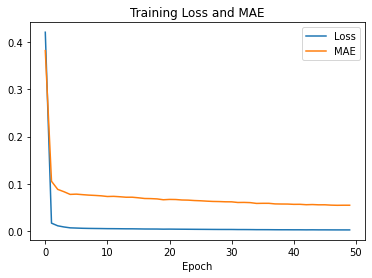

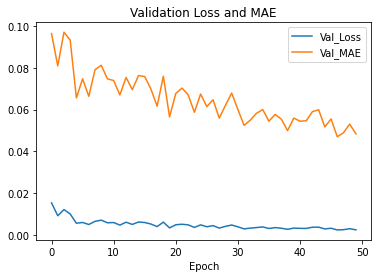

     Correct Entropy  Model Predictions
0            1.92547           1.977457
1            1.83266           1.889734
2            1.52335           1.571868
3            1.83660           1.893596
4            1.82135           1.878618
..               ...                ...
995          1.77604           1.832535
996          1.94712           1.996978
997          1.71134           1.766192
998          1.55777           1.607334
999          1.99351           2.038558

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


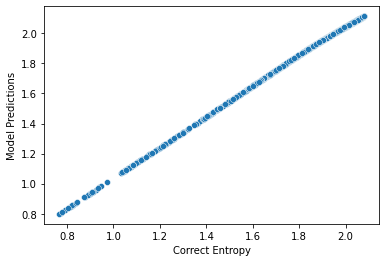

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

df = pd.read_csv('Data_Single_Interval_1.csv', encoding='utf-8', encoding_errors='ignore')

df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)

# do the splitting twice for to separate the data points to train-validation-test sets, we do 80-10-10%.

X = df1
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1


model = Sequential()

model.add(Dense(64,  activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1)) 

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=["mae"]) 

# replace with optimizer = keras.optimizers.RMSprop(learning_rate=1e-2) to add learning rate

model.fit(x = X_train, y = y_train, epochs = 50, batch_size = 128, validation_data=(X_val, y_val)) 

plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.plot(model.history.history["val_loss"], label="Val_Loss")
plt.plot(model.history.history["val_mae"], label="Val_MAE")
plt.title("Validation Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

### With KerasTuner

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Single_Interval_1.csv', encoding='utf-8', encoding_errors='ignore')

df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)

# do the splitting twice for to separate the data points to train-validation-test sets, we do 80-10-10%.

X = df1
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

def build_model(hp):
    units = hp.Int(name="units", min_value=16, max_value=64, step=16)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(units, activation="relu"),
        layers.Dense(units, activation="relu"),
        layers.Dense(units, activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="singleintervaltest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

# print(tuner.search_space_summary())

Trial 10 Complete [00h 00m 06s]
val_loss: 6.414095139462006e-07

Best val_loss So Far: 1.1464135951655408e-07
Total elapsed time: 00h 01m 17s
INFO:tensorflow:Oracle triggered exit


In [3]:
tuner.results_summary()

Results summary
Results in singleintervaltest\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 48
optimizer: adam
Score: 1.1464135951655408e-07
Trial summary
Hyperparameters:
units: 64
optimizer: adam
Score: 1.8549690139479935e-07
Trial summary
Hyperparameters:
units: 64
optimizer: adam
Score: 3.9314456756756044e-07
Trial summary
Hyperparameters:
units: 64
optimizer: adam
Score: 6.131986083346419e-07
Trial summary
Hyperparameters:
units: 64
optimizer: adam
Score: 6.414095139462006e-07
Trial summary
Hyperparameters:
units: 64
optimizer: adam
Score: 1.1194959768090484e-06
Trial summary
Hyperparameters:
units: 64
optimizer: adam
Score: 1.3764291821871666e-06
Trial summary
Hyperparameters:
units: 64
optimizer: adam
Score: 2.0817293489017175e-06
Trial summary
Hyperparameters:
units: 16
optimizer: adam
Score: 4.936454956805392e-06
Trial summary
Hyperparameters:
units: 64
optimizer: rmsprop
Score: 0.003330985549837351


In [4]:
# query the best hyperparameter configurations, can then be used to retrain
# we can then pass to the model-building function

top_n = 4 # query the best 4
best_hps = tuner.get_best_hyperparameters(top_n) 
best_hps # returns a list

When retraining these models, you may want to include the validation data as part of the training data, since you won't be making any further hyperparameter changes, and thus you will no longer be evaluating performance on the validation data. In the example, we'd train these final models on the totality of the original training data, without reserving a validation set.

In [5]:
# Build the model with the best hp and retrain the model by itself "with the entire dataset"
# We will need to increase slightly the epochs as we are training on the entire dataset.

model = build_model(best_hps[0])
model.fit(X_train_full, y_train_full, epochs=60)

Epoch 1/60
282/282 [==============================] - 0s 610us/step - loss: 0.1745 - mae: 0.2195
Epoch 2/60
282/282 [==============================] - 0s 575us/step - loss: 0.0013 - mae: 0.0197
Epoch 3/60
282/282 [==============================] - 0s 575us/step - loss: 1.9551e-05 - mae: 0.0036
Epoch 4/60
282/282 [==============================] - 0s 573us/step - loss: 7.0925e-06 - mae: 0.0022
Epoch 5/60
282/282 [==============================] - 0s 574us/step - loss: 6.9044e-06 - mae: 0.0021
Epoch 6/60
282/282 [==============================] - 0s 593us/step - loss: 6.8081e-06 - mae: 0.0021
Epoch 7/60
282/282 [==============================] - 0s 594us/step - loss: 5.7839e-06 - mae: 0.0019
Epoch 8/60
282/282 [==============================] - 0s 579us/step - loss: 6.0298e-06 - mae: 0.0020
Epoch 9/60
282/282 [==============================] - 0s 579us/step - loss: 6.6794e-06 - mae: 0.0021
Epoch 10/60
282/282 [==============================] - 0s 603us/step - loss: 6.1045e-06 - mae: 0.00

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 48)                2448      
                                                                 
 dense_6 (Dense)             (None, 48)                2352      
                                                                 
 dense_7 (Dense)             (None, 48)                2352      
                                                                 
 dense_8 (Dense)             (None, 48)                2352      
                                                                 
 dense_9 (Dense)             (None, 1)                 49        
                                                                 
Total params: 9,553
Trainable params: 9,553
Non-trainable params: 0
_________________________________________________________________


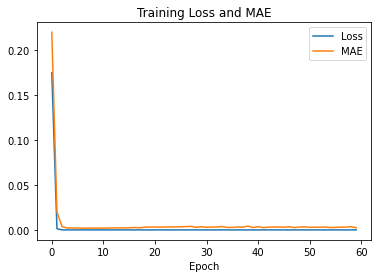

     Correct Entropy  Model Predictions
0            1.92547           1.917761
1            1.83266           1.824777
2            1.52335           1.516507
3            1.83660           1.828748
4            1.82135           1.813345
..               ...                ...
995          1.77604           1.767360
996          1.94712           1.939250
997          1.71134           1.700823
998          1.55777           1.550622
999          1.99351           1.985026

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


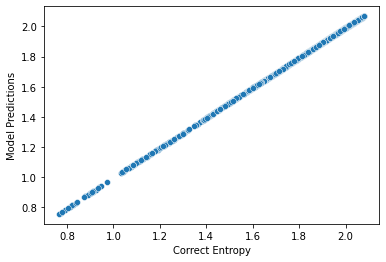

In [7]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

There is one last parameter we need to settle: the optimal number of epochs to train for. 

If we are not worrying about slightly underperforming, we can just reload the top-performing models with the best weights saved during the hyperparameter search

The model is already saved at its best performing epoch evaluated on the validation_data. Thus in general we only need to set epoch = 1 here, but we increase slightly the epochs as we are training on the entire dataset.

In [8]:
best_models = tuner.get_best_models(top_n)
best_models

In [9]:
model = best_models[2] 
model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
282/282 [==============================] - 0s 596us/step - loss: 4.2666e-07 - mae: 5.2107e-04
Epoch 2/10
282/282 [==============================] - 0s 592us/step - loss: 3.3301e-07 - mae: 4.5970e-04
Epoch 3/10
282/282 [==============================] - 0s 588us/step - loss: 4.0744e-07 - mae: 5.1034e-04
Epoch 4/10
282/282 [==============================] - 0s 593us/step - loss: 4.5110e-07 - mae: 5.3436e-04
Epoch 5/10
282/282 [==============================] - 0s 596us/step - loss: 5.1784e-07 - mae: 5.8020e-04
Epoch 6/10
282/282 [==============================] - 0s 596us/step - loss: 7.3583e-07 - mae: 6.4978e-04
Epoch 7/10
282/282 [==============================] - 0s 593us/step - loss: 5.6795e-07 - mae: 5.8673e-04
Epoch 8/10
282/282 [==============================] - 0s 602us/step - loss: 1.1035e-06 - mae: 8.2871e-04
Epoch 9/10
282/282 [==============================] - 0s 646us/step - loss: 3.0865e-06 - mae: 0.0014
Epoch 10/10
282/282 [==============================] - 0s 6

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,809
Trainable params: 15,809
Non-trainable params: 0
_________________________________________________________________


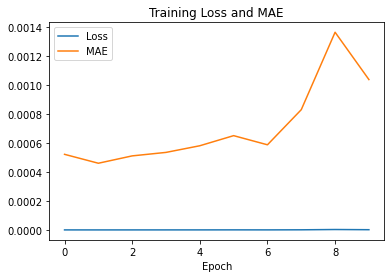

     Correct Entropy  Model Predictions
0            1.92547           1.923912
1            1.83266           1.830849
2            1.52335           1.522435
3            1.83660           1.834750
4            1.82135           1.819620
..               ...                ...
995          1.77604           1.774451
996          1.94712           1.945652
997          1.71134           1.709969
998          1.55777           1.556600
999          1.99351           1.991966

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


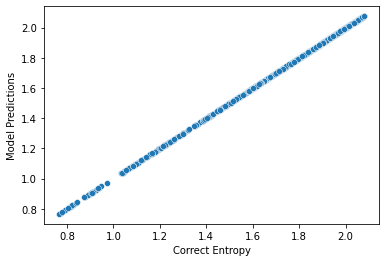

In [11]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

### Reduce the dimensions of data (keep only k=10).

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Single_Interval_1.csv', encoding='utf-8', encoding_errors='ignore')

df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)

df2 = df1.iloc[range(0,10000),range(0,10)]
df2

# note that in the end we need to re-compute the approximate entropy by summing each row

,1,2,3,4,5,6,7,8,9,10
0,0.437659,0.117349,0.051328,0.029216,0.019315,0.013934,0.010616,0.008396,0.006825,0.005668
1,0.438359,0.117652,0.051479,0.029303,0.019372,0.013975,0.010648,0.008421,0.006846,0.005685
2,0.439056,0.117954,0.051629,0.029390,0.019429,0.014016,0.010679,0.008446,0.006867,0.005702
3,0.439748,0.118253,0.051779,0.029477,0.019486,0.014057,0.010711,0.008471,0.006887,0.005720
4,0.440436,0.118552,0.051928,0.029563,0.019543,0.014098,0.010742,0.008496,0.006907,0.005737
...,...,...,...,...,...,...,...,...,...,...
9995,0.789544,0.320856,0.178727,0.114865,0.080510,0.059902,0.046567,0.037433,0.030887,0.026023
9996,0.789549,0.320859,0.178730,0.114867,0.080512,0.059903,0.046568,0.037433,0.030888,0.026023
9997,0.789555,0.320863,0.178733,0.114870,0.080513,0.059904,0.046569,0.037434,0.030889,0.026024
9998,0.789560,0.320867,0.178736,0.114872,0.080515,0.059906,0.046570,0.037435,0.030889,0.026025


In [32]:
X = df2
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

def build_model(hp):
    units = hp.Int(name="units", min_value=16, max_value=64, step=16)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(units, activation="relu"),
        layers.Dense(units, activation="relu"),
        layers.Dense(units, activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="singleintervaltest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

# print(tuner.search_space_summary())

Trial 10 Complete [00h 00m 07s]
val_loss: 7.042757204089867e-06

Best val_loss So Far: 7.593366717628669e-07
Total elapsed time: 00h 01m 16s
INFO:tensorflow:Oracle triggered exit


In [33]:
tuner.results_summary()

Results summary
Results in singleintervaltest\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 64
optimizer: adam
Score: 7.593366717628669e-07
Trial summary
Hyperparameters:
units: 32
optimizer: adam
Score: 1.7274934407396358e-06
Trial summary
Hyperparameters:
units: 48
optimizer: adam
Score: 2.313039544787898e-06
Trial summary
Hyperparameters:
units: 32
optimizer: adam
Score: 4.453569829365733e-06
Trial summary
Hyperparameters:
units: 32
optimizer: adam
Score: 7.042757204089867e-06
Trial summary
Hyperparameters:
units: 32
optimizer: adam
Score: 9.324305210611783e-06
Trial summary
Hyperparameters:
units: 16
optimizer: adam
Score: 1.4584310520149302e-05
Trial summary
Hyperparameters:
units: 32
optimizer: adam
Score: 3.5044261494476814e-05
Trial summary
Hyperparameters:
units: 32
optimizer: adam
Score: 8.048852942010853e-05
Trial summary
Hyperparameters:
units: 32
optimizer: rmsprop
Score: 0.0012634693994186819


In [34]:
# query the best hyperparameter configurations, can then be used to retrain
# we can then pass to the model-building function

top_n = 4 # query the best 4
best_hps = tuner.get_best_hyperparameters(top_n) 
best_hps # returns a list

In [35]:
# Build the model with the best hp and retrain the model by itself "with the entire dataset"
# We will need to increase slightly the epochs as we are training on the entire dataset.

model = build_model(best_hps[0])
model.fit(X_train_full, y_train_full, epochs=60)

Epoch 1/60
282/282 [==============================] - 0s 612us/step - loss: 0.1291 - mae: 0.1828
Epoch 2/60
282/282 [==============================] - 0s 607us/step - loss: 0.0021 - mae: 0.0314
Epoch 3/60
282/282 [==============================] - 0s 604us/step - loss: 7.1250e-05 - mae: 0.0066
Epoch 4/60
282/282 [==============================] - 0s 603us/step - loss: 3.2185e-05 - mae: 0.0042
Epoch 5/60
282/282 [==============================] - 0s 610us/step - loss: 1.8011e-05 - mae: 0.0030
Epoch 6/60
282/282 [==============================] - 0s 607us/step - loss: 1.3537e-05 - mae: 0.0026
Epoch 7/60
282/282 [==============================] - 0s 603us/step - loss: 9.6531e-06 - mae: 0.0021
Epoch 8/60
282/282 [==============================] - 0s 607us/step - loss: 8.1641e-06 - mae: 0.0020
Epoch 9/60
282/282 [==============================] - 0s 642us/step - loss: 7.6298e-06 - mae: 0.0020
Epoch 10/60
282/282 [==============================] - 0s 606us/step - loss: 6.0289e-06 - mae: 0.00

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                704       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,249
Trainable params: 13,249
Non-trainable params: 0
_________________________________________________________________


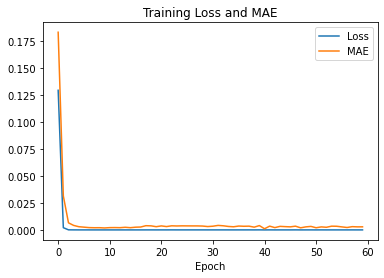

     Correct Entropy  Model Predictions
0            1.92547           1.923935
1            1.83266           1.831724
2            1.52335           1.521839
3            1.83660           1.835639
4            1.82135           1.820447
..               ...                ...
995          1.77604           1.774966
996          1.94712           1.945919
997          1.71134           1.709361
998          1.55777           1.556769
999          1.99351           1.992592

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


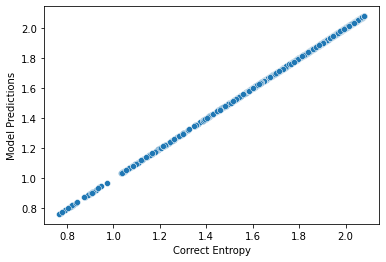

In [37]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

In [93]:
# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

     Correct Entropy  Model Predictions  Approximate Entropy
0            1.92547           1.923935             1.587378
1            1.83266           1.831724             1.525470
2            1.52335           1.521839             1.306891
3            1.83660           1.835639             1.528130
4            1.82135           1.820447             1.517805
..               ...                ...                  ...
995          1.77604           1.774966             1.486854
996          1.94712           1.945919             1.601571
997          1.71134           1.709361             1.441957
998          1.55777           1.556769             1.332120
999          1.99351           1.992592             1.631658

[1000 rows x 3 columns]
     Abs Error for Model  Abs Error for Approx
0               0.001535              0.338092
1               0.000936              0.307190
2               0.001511              0.216459
3               0.000961              0.308470
4       

### Reduce model size with regularization.

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Single_Interval_1.csv', encoding='utf-8', encoding_errors='ignore')

df1 = df.drop(['Correct Entropy','Approx Entropy'], axis = 1)

df2 = df1.iloc[range(0,10000),range(0,10)]
df2

# note that in the end we need to re-compute the approximate entropy by summing each row

X = df2
y = df['Correct Entropy']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

def build_model(hp):
    units = hp.Int(name="units", min_value=1, max_value=2, step=1)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, kernel_regularizer=regularizers.l1_l2(l1=1e-2, l2=1e-2), activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="singleintervaltest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

# print(tuner.search_space_summary())

Trial 10 Complete [00h 00m 06s]
val_loss: 0.0500048054382205

Best val_loss So Far: 0.03258594498038292
Total elapsed time: 00h 01m 08s
INFO:tensorflow:Oracle triggered exit


In [2]:
tuner.results_summary()

Results summary
Results in singleintervaltest\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.03258594498038292
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.03530964162200689
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.037223147228360176
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.046157462522387505
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.04755834396928549
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.047850919887423515
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.0500048054382205
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.05571338161826134
Trial summary
Hyperparameters:
units: 1
optimizer: rmsprop
Score: 0.057513756677508354
Trial summary
Hyperparameters:
units: 1
optimizer: adam
Score: 0.07487893849611282


In [3]:
# query the best hyperparameter configurations, can then be used to retrain
# we can then pass to the model-building function

top_n = 4 # query the best 4
best_hps = tuner.get_best_hyperparameters(top_n) # returns a list

# Build the model with the best hp and retrain the model by itself "with the entire dataset"
# We will need to increase slightly the epochs as we are training on the entire dataset.

model = build_model(best_hps[0])
model.fit(X_train_full, y_train_full, epochs=60)

Epoch 1/60
282/282 [==============================] - 0s 459us/step - loss: 2.7823 - mae: 1.6239
Epoch 2/60
282/282 [==============================] - 0s 451us/step - loss: 1.7743 - mae: 1.2885
Epoch 3/60
282/282 [==============================] - 0s 444us/step - loss: 0.5745 - mae: 0.6536
Epoch 4/60
282/282 [==============================] - 0s 444us/step - loss: 0.0987 - mae: 0.1814
Epoch 5/60
282/282 [==============================] - 0s 449us/step - loss: 0.0762 - mae: 0.1755
Epoch 6/60
282/282 [==============================] - 0s 449us/step - loss: 0.0696 - mae: 0.1805
Epoch 7/60
282/282 [==============================] - 0s 448us/step - loss: 0.0672 - mae: 0.1815
Epoch 8/60
282/282 [==============================] - 0s 449us/step - loss: 0.0658 - mae: 0.1814
Epoch 9/60
282/282 [==============================] - 0s 437us/step - loss: 0.0646 - mae: 0.1798
Epoch 10/60
282/282 [==============================] - 0s 465us/step - loss: 0.0636 - mae: 0.1782
Epoch 11/60
282/282 [========

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [5]:
top_n = 4 # query the best 4
best_models = tuner.get_best_models(top_n)


model = best_models[0] 
model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
282/282 [==============================] - 0s 447us/step - loss: 0.0220 - mae: 0.0552
Epoch 2/10
282/282 [==============================] - 0s 454us/step - loss: 0.0211 - mae: 0.0535
Epoch 3/10
282/282 [==============================] - 0s 461us/step - loss: 0.0204 - mae: 0.0514
Epoch 4/10
282/282 [==============================] - 0s 486us/step - loss: 0.0197 - mae: 0.0499
Epoch 5/10
282/282 [==============================] - 0s 480us/step - loss: 0.0190 - mae: 0.0484
Epoch 6/10
282/282 [==============================] - 0s 486us/step - loss: 0.0184 - mae: 0.0472
Epoch 7/10
282/282 [==============================] - 0s 472us/step - loss: 0.0178 - mae: 0.0460
Epoch 8/10
282/282 [==============================] - 0s 472us/step - loss: 0.0174 - mae: 0.0453
Epoch 9/10
282/282 [==============================] - 0s 472us/step - loss: 0.0169 - mae: 0.0445
Epoch 10/10
282/282 [==============================] - 0s 447us/step - loss: 0.0165 - mae: 0.0435


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 22        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


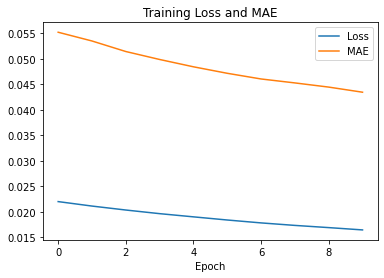

     Correct Entropy  Model Predictions
0            1.92547           1.903658
1            1.83266           1.839208
2            1.52335           1.591673
3            1.83660           1.842026
4            1.82135           1.831060
..               ...                ...
995          1.77604           1.797781
996          1.94712           1.918100
997          1.71134           1.748401
998          1.55777           1.621905
999          1.99351           1.948310

[1000 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)
     Correct Entropy  Model Predictions  Approximate Entropy
0            1.92547           1.903658             1.587378
1            1.83266           1.839208             1.525470
2            1.52335           1.591673             1.306891
3            1.83660           1.842026             1.528130
4            1.82135           1.831060             1.517805
..               ...                ...                  ...
995          1.77604           

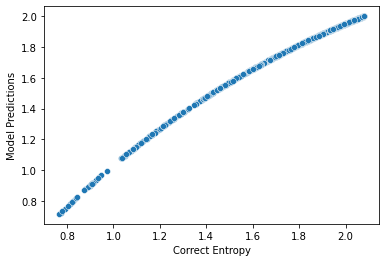

In [7]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

### Reduce data sets 

Note that we need to randomly select data sets from the 10000 sample data sets. 

Dimensions 10 or 50.

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Single_Interval_1.csv', encoding='utf-8', encoding_errors='ignore')

# randomly select data sets but with fixed random_state
# note that we need to first sample then drop the first two entropy columns, nor an error in train-test split
df1 = df.sample(n = 2000, random_state = 42)
df1 = df1.reset_index(drop=True)
df2 = df1.drop(['Correct Entropy','Approx Entropy'], axis = 1) 
df2 = df2.reset_index(drop=True)

# comment out the following if we want to keep dimensions to be 50
df1 = df1.iloc[range(0,2000),range(0,2)] 
df2 = df2.iloc[range(0,2000),range(0,1)]
df2

,1
0,0.764042
1,0.747033
2,0.680984
3,0.747779
4,0.744877
...,...
1995,0.765483
1996,0.779659
1997,0.776762
1998,0.647475


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

# note that in the end we need to re-compute the approximate entropy by summing each row

X = df2
y = df1['Correct Entropy'] # note here use df1 instead of df
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=1.0/9, random_state=42) 
# 1.0/9 x 0.9 = 0.1

def build_model(hp):
    units = hp.Int(name="units", min_value=1, max_value=2, step=1)
    # sample hyperparameter values from hp object. After sampling, these values (such as "units" variables here) 
    # are just regular Python constants.
    model = keras.Sequential([
        layers.Dense(units, activation="relu"),
        layers.Dense(1)
    ])
    optimizer = hp.Choice(name="optimizer", values=["rmsprop", "adam"])
    # different kinds of hyperparameters are available: Int, Float, Boolean, Choice, Fixed
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model 
    # the function returns a compiled model
    
# note we can also use hp.xxx to tune layers, activation functions etc.

tuner = kt.BayesianOptimization(build_model, # specify the model-building fun (or hypermodel instance)
                                objective="val_loss", 
                                # specify the metric that the tuner will seek to optimize, always specify validation metrics,
                                # since the goal of the search process is to find models that generalize
                                max_trials=10, # max number of different model configurations ("trials")
                                executions_per_trial=2, 
                                # To reduce metrics variance, you can train the same model multiple times and 
                                # average the results. This is how many training rounds (executions) to run for each trial. 
                                directory="singleintervaltest", # where to store search logs
                                overwrite=True, 
                                #whether to overwrite data in directory to start a new search. 
                                # Set this to True if you have modified the model-building fun, or to False to resume 
                                # a previously started search with the same model-building fun.
                                ) 

callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5),] 
# patience=x: interrupts training when monitor has stopped improving for x epochs

tuner.search(x = X_train, y = y_train, batch_size=128, epochs=50, validation_data=(X_val, y_val), callbacks=callbacks, verbose=2,)
# this takes the same arguments as fit() (it simply passes them down to fit() for each new model)

# here use a large number of epochs (you don't know in advance how many epochs each model will need), and use an EarlyStopping
# callback to stop training when you start overfitting.

# print(tuner.search_space_summary())

Trial 10 Complete [00h 00m 05s]
val_loss: 1.300441324710846

Best val_loss So Far: 0.030962573364377022
Total elapsed time: 00h 00m 55s
INFO:tensorflow:Oracle triggered exit


In [3]:
tuner.results_summary()

Results summary
Results in singleintervaltest\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.030962573364377022
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.03583029191941023
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.06469657085835934
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.2547237165272236
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.6548475939780474
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.6620211852714419
Trial summary
Hyperparameters:
units: 1
optimizer: rmsprop
Score: 0.6659059338271618
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 0.9886375367641449
Trial summary
Hyperparameters:
units: 2
optimizer: rmsprop
Score: 1.300441324710846
Trial summary
Hyperparameters:
units: 2
optimizer: adam
Score: 1.452070415019989


In [15]:
# query the best hyperparameter configurations, can then be used to retrain
# we can then pass to the model-building function

top_n = 4 # query the best 4
best_hps = tuner.get_best_hyperparameters(top_n) # returns a list

# Build the model with the best hp and retrain the model by itself "with the entire dataset"
# We will need to increase slightly the epochs as we are training on the entire dataset.

model = build_model(best_hps[0])
model.fit(X_train_full, y_train_full, epochs=60)

Epoch 1/60
57/57 [==============================] - 0s 499us/step - loss: 3.0643 - mae: 1.7275
Epoch 2/60
57/57 [==============================] - 0s 463us/step - loss: 2.8682 - mae: 1.6697
Epoch 3/60
57/57 [==============================] - 0s 463us/step - loss: 2.6825 - mae: 1.6130
Epoch 4/60
57/57 [==============================] - 0s 499us/step - loss: 2.5029 - mae: 1.5564
Epoch 5/60
57/57 [==============================] - 0s 481us/step - loss: 2.3294 - mae: 1.4997
Epoch 6/60
57/57 [==============================] - 0s 481us/step - loss: 2.1627 - mae: 1.4431
Epoch 7/60
57/57 [==============================] - 0s 534us/step - loss: 2.0029 - mae: 1.3865
Epoch 8/60
57/57 [==============================] - 0s 499us/step - loss: 1.8491 - mae: 1.3299
Epoch 9/60
57/57 [==============================] - 0s 463us/step - loss: 1.7019 - mae: 1.2734
Epoch 10/60
57/57 [==============================] - 0s 498us/step - loss: 1.5609 - mae: 1.2168
Epoch 11/60
57/57 [==============================

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [4]:
top_n = 4 # query the best 4
best_models = tuner.get_best_models(top_n)


model = best_models[0] 
model.fit(X_train_full, y_train_full, epochs=10)

Epoch 1/10
57/57 [==============================] - 0s 695us/step - loss: 0.0287 - mae: 0.1370
Epoch 2/10
57/57 [==============================] - 0s 1ms/step - loss: 0.0272 - mae: 0.1332
Epoch 3/10
57/57 [==============================] - 0s 1ms/step - loss: 0.0256 - mae: 0.1303
Epoch 4/10
57/57 [==============================] - 0s 1ms/step - loss: 0.0242 - mae: 0.1260
Epoch 5/10
57/57 [==============================] - 0s 883us/step - loss: 0.0228 - mae: 0.1233
Epoch 6/10
57/57 [==============================] - 0s 695us/step - loss: 0.0216 - mae: 0.1201
Epoch 7/10
57/57 [==============================] - 0s 997us/step - loss: 0.0203 - mae: 0.1165
Epoch 8/10
57/57 [==============================] - 0s 1ms/step - loss: 0.0190 - mae: 0.1132
Epoch 9/10
57/57 [==============================] - 0s 695us/step - loss: 0.0178 - mae: 0.1100
Epoch 10/10
57/57 [==============================] - 0s 570us/step - loss: 0.0165 - mae: 0.1064


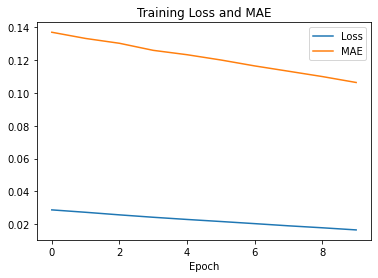

     Correct Entropy  Model Predictions
0            1.80854           1.804357
1            1.53406           1.662247
2            1.27184           1.496244
3            1.72941           1.766344
4            1.82226           1.810725
..               ...                ...
195          1.41806           1.592825
196          1.63718           1.719098
197          1.29795           1.514279
198          2.00257           1.888555
199          1.95803           1.870296

[200 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)
     Correct Entropy  Model Predictions  Approximate Entropy
0            1.80854           1.804357             0.742414
1            1.53406           1.662247             0.683535
2            1.27184           1.496244             0.614756
3            1.72941           1.766344             0.726665
4            1.82226           1.810725             0.745053
..               ...                ...                  ...
195          1.41806           1

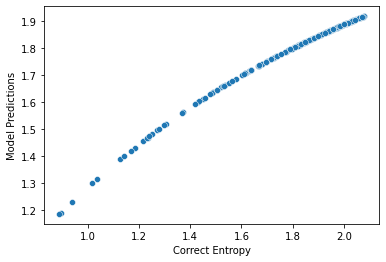

In [5]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# note that we don't need to plot the val_loss as we are training on the full dataset except test data

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

### Reduce data sets (with K-fold validation)

Note that we need to randomly select data sets from the 10000 sample data sets. 

Dimensions 10 or 50.

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>") 
# to restart the kernel, prevent from reusing any trained models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

df = pd.read_csv('Data_Single_Interval_1.csv', encoding='utf-8', encoding_errors='ignore')

# randomly select data sets but with fixed random_state
# note that we need to first sample then drop the first two entropy columns, nor an error in train-test split
df1 = df.sample(n = 2000, random_state = 42)
df1 = df1.reset_index(drop=True)
df2 = df1.drop(['Correct Entropy','Approx Entropy'], axis = 1) 
df2 = df2.reset_index(drop=True)

# comment out the following if we want to keep dimensions to be 50
df1 = df1.iloc[range(0,2000),range(0,2)] 
df2 = df2.iloc[range(0,2000),range(0,10)]
df2

,1,2,3,4,5,6,7,8,9,10
0,0.764042,0.302414,0.165104,0.104572,0.072552,0.053608,0.041480,0.033236,0.027360,0.023010
1,0.747033,0.290459,0.156490,0.098200,0.067709,0.049828,0.038455,0.030758,0.025289,0.021247
2,0.680984,0.246577,0.126343,0.076740,0.051876,0.037736,0.028922,0.023030,0.018872,0.015810
3,0.747779,0.290977,0.156860,0.098471,0.067914,0.049988,0.038582,0.030862,0.025376,0.021321
4,0.744877,0.288963,0.155424,0.097419,0.067120,0.049371,0.038091,0.030461,0.025041,0.021036
...,...,...,...,...,...,...,...,...,...,...
1995,0.765483,0.303439,0.165850,0.105130,0.072979,0.053943,0.041749,0.033457,0.027545,0.023168
1996,0.779659,0.313633,0.173343,0.110766,0.077321,0.057367,0.044510,0.035731,0.029454,0.024797
1997,0.776762,0.311534,0.171790,0.109591,0.076412,0.056647,0.043929,0.035251,0.029051,0.024452
1998,0.647475,0.225813,0.112890,0.067595,0.045352,0.032867,0.025140,0.019992,0.016362,0.013691


In [2]:
from sklearn.model_selection import KFold # import K-fold validation


X = df2
y = df1['Correct Entropy'] # note here use df1 instead of df
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

num_folds = 5 
kf = KFold(n_splits=num_folds, shuffle=False, random_state = None)
# if we set shuffle and random_state, would be the "iterated K-fold validation"

fold_no = 1
for train, test in kf.split(X_train_full, y_train_full):
    print(f'Training for fold {fold_no} ...')
    model = Sequential()
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1)) 
    
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics=["mae"]) 

    model.fit(x = X_train_full, y = y_train_full, epochs = 10, batch_size = 128) 
    
    val_scores = model.evaluate(X_test, y_test, verbose=0)
    loss_per_fold = []
    loss_per_fold.append(val_scores[0])
    mae_per_fold = []
    mae_per_fold.append(val_scores[1])
    
    fold_no = fold_no + 1
    
loss_val_score = np.average(val_scores[0])
mae_val_score = np.average(val_scores[1])    

print(loss_val_score)
print(mae_val_score)


Training for fold 1 ...
Epoch 1/10
15/15 [==============================] - 0s 713us/step - loss: 3.2907 - mae: 1.7863
Epoch 2/10
15/15 [==============================] - 0s 499us/step - loss: 2.2886 - mae: 1.4864
Epoch 3/10
15/15 [==============================] - 0s 499us/step - loss: 1.5852 - mae: 1.2328
Epoch 4/10
15/15 [==============================] - 0s 570us/step - loss: 1.0613 - mae: 1.0024
Epoch 5/10
15/15 [==============================] - 0s 570us/step - loss: 0.6462 - mae: 0.7736
Epoch 6/10
15/15 [==============================] - 0s 570us/step - loss: 0.3405 - mae: 0.5500
Epoch 7/10
15/15 [==============================] - 0s 570us/step - loss: 0.1423 - mae: 0.3433
Epoch 8/10
15/15 [==============================] - 0s 570us/step - loss: 0.0461 - mae: 0.1897
Epoch 9/10
15/15 [==============================] - 0s 570us/step - loss: 0.0222 - mae: 0.1236
Epoch 10/10
15/15 [==============================] - 0s 570us/step - loss: 0.0201 - mae: 0.1120
Training for fold 2 ...
E

In [3]:
# note that we need to train the final model on all the training data again.
model.fit(x = X_train_full, y = y_train_full, epochs = 10, batch_size = 128) 
#test_score = model.evaluate(X_test, y_test, verbose=0)

#test_score

Epoch 1/10
15/15 [==============================] - 0s 602us/step - loss: 0.0143 - mae: 0.0943
Epoch 2/10
15/15 [==============================] - 0s 570us/step - loss: 0.0126 - mae: 0.0897
Epoch 3/10
15/15 [==============================] - 0s 569us/step - loss: 0.0109 - mae: 0.0840
Epoch 4/10
15/15 [==============================] - 0s 570us/step - loss: 0.0094 - mae: 0.0780
Epoch 5/10
15/15 [==============================] - 0s 641us/step - loss: 0.0080 - mae: 0.0716
Epoch 6/10
15/15 [==============================] - 0s 570us/step - loss: 0.0067 - mae: 0.0663
Epoch 7/10
15/15 [==============================] - 0s 570us/step - loss: 0.0057 - mae: 0.0611
Epoch 8/10
15/15 [==============================] - 0s 570us/step - loss: 0.0046 - mae: 0.0557
Epoch 9/10
15/15 [==============================] - 0s 570us/step - loss: 0.0038 - mae: 0.0505
Epoch 10/10
15/15 [==============================] - 0s 570us/step - loss: 0.0031 - mae: 0.0456


In [4]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                704       
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


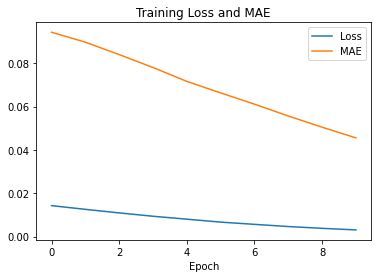

     Correct Entropy  Model Predictions
0            1.80854           1.791300
1            1.53406           1.571706
2            1.27184           1.347156
3            1.72941           1.729662
4            1.82226           1.801853
..               ...                ...
195          1.41806           1.474114
196          1.63718           1.656109
197          1.29795           1.370147
198          2.00257           1.936585
199          1.95803           1.903978

[200 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)
     Correct Entropy  Model Predictions  Approximate Entropy
0            1.80854           1.791300             1.509095
1            1.53406           1.571706             1.314761
2            1.27184           1.347156             1.115861
3            1.72941           1.729662             1.454576
4            1.82226           1.801853             1.518427
..               ...                ...                  ...
195          1.41806           1

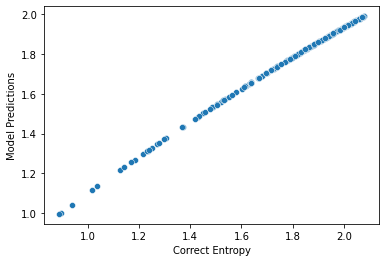

In [5]:
plt.plot(model.history.history["loss"], label="Loss")
plt.plot(model.history.history["mae"], label="MAE")
plt.title("Training Loss and MAE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

test_predictions = model.predict(X_test)
test_pred = pd.DataFrame(test_predictions)
test_pred.columns = ['Model Predictions']

pred_df = pd.DataFrame(y_test)
pred_df_reset_index = pred_df.reset_index(drop=True)

df_compare = pd.concat([pred_df_reset_index, test_pred], axis = 1)
print(df_compare)

print(sns.scatterplot(x='Correct Entropy', y='Model Predictions', data=df_compare))

# compute percent relative error (=(|absolute error|/true value)*100%)

# extract the X_test and then sum each row to get the approximate entropy
df_approx = pd.DataFrame(X_test)
df_approx_reset_index = df_approx.reset_index(drop=True)
df_approx1 = df_approx_reset_index.sum(axis = 1)
df_approx1 = pd.DataFrame(df_approx1)
df_approx1.columns = ['Approximate Entropy']


df_compare1 = pd.concat([df_compare, df_approx1], axis = 1)
print(df_compare1)


# absolute error for model predictions and approximate entropy

df_abs_error1 = abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])
df_abs_error2 = abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])
df_abs_error = pd.concat([df_abs_error1, df_abs_error2], axis = 1)
df_abs_error.columns = ['Abs Error for Model', 'Abs Error for Approx']
print(df_abs_error)

# percent relative error for model predictions and approximate entropy

df_rel_error1 = (abs(df_compare1['Correct Entropy']-df_compare1['Model Predictions'])/df_compare1['Correct Entropy'])*100
df_rel_error2 = (abs(df_compare1['Correct Entropy']-df_compare1['Approximate Entropy'])/df_compare1['Correct Entropy'])*100
df_rel_error = pd.concat([df_rel_error1, df_rel_error2], axis = 1)
df_rel_error.columns = ['Rel Error for Model', 'Rel Error for Approx']
print(df_rel_error)

Find some new papers discussion DL applications in regression/analytic continuation. (How to write the paper, what precision could be achieved etc.?)

Maybe we need to try to predict values that are completely outside the range of the current physical parameters and compare with the correct entropy. Make a plot and see if we can extract any information regarding the analytic expressions.

Do some other examples, mutual information, XXZ spin chain.

The final case should be a unsupervised or semi-supervised learning problem, are there suitable regression algorithms?